In [ ]:
'''
Are two selected genes co-expressed?

Are any genes co-expressed with a selected gene?

'''

In [1]:
import scanpy as sc
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
#simple import and preprocessing
adata = sc.read_10x_mtx('../tutorial_sample/outs/filtered_feature_bc_matrix/')
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata = adata[adata.obs.pct_counts_mt < 20]
sc.pp.normalize_total(adata, target_sum=1e4)

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [3]:
adata

AnnData object with n_obs × n_vars = 8093 × 21949
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [4]:
adata.var_names

Index(['AL627309.1', 'AL627309.5', 'LINC01409', 'FAM87B', 'LINC01128',
       'LINC00115', 'FAM41C', 'AL645608.2', 'AL645608.4', 'LINC02593',
       ...
       'MT-CYB', 'BX004987.1', 'AC145212.1', 'MAFIP', 'AC011043.1',
       'AL354822.1', 'AL592183.1', 'AC240274.1', 'AC007325.4', 'zika'],
      dtype='object', length=21949)

In [10]:
i1 = np.where(adata.var_names == 'zika')[0][0]

In [11]:
i2 = np.where(adata.var_names == 'IFITM1')[0][0]

In [9]:
data = adata.X.toarray()
data.shape

(8093, 21949)

In [12]:
data[:, i1]

array([ 0.        ,  0.3849559 ,  0.47232196, ..., 83.49873   ,
        0.        ,  0.        ], dtype=float32)

In [13]:
stats.pearsonr(data[:, i1], data[:, i2])

(-0.004018901858421179, 0.7177328380898428)

In [14]:
out = []
for gene in adata.var_names:
    i2 = np.where(adata.var_names == gene)[0][0]
    res = stats.pearsonr(data[:, i1], data[:, i2])
    out.append([gene, res[0], res[1]])

In [15]:
df = pd.DataFrame(out, columns = ['gene', 'r', 'p'])
df

,gene,r,p
0,AL627309.1,0.007712,4.878679e-01
1,AL627309.5,-0.000773,9.445847e-01
2,LINC01409,0.037610,7.140523e-04
3,FAM87B,-0.003992,7.195206e-01
4,LINC01128,-0.008512,4.438714e-01
...,...,...,...
21944,AL354822.1,-0.013347,2.299292e-01
21945,AL592183.1,0.004540,6.830051e-01
21946,AC240274.1,0.110236,2.633133e-23
21947,AC007325.4,0.020117,7.034826e-02


In [16]:
df['bon'] = df.p * len(df)
df['-log10_p'] = -np.log10(df.p)

df

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,gene,r,p,bon,-log10_p
0,AL627309.1,0.007712,4.878679e-01,1.070821e+04,0.311698
1,AL627309.5,-0.000773,9.445847e-01,2.073269e+04,0.024759
2,LINC01409,0.037610,7.140523e-04,1.567273e+01,3.146270
3,FAM87B,-0.003992,7.195206e-01,1.579276e+04,0.142957
4,LINC01128,-0.008512,4.438714e-01,9.742533e+03,0.352743
...,...,...,...,...,...
21944,AL354822.1,-0.013347,2.299292e-01,5.046717e+03,0.638406
21945,AL592183.1,0.004540,6.830051e-01,1.499128e+04,0.165576
21946,AC240274.1,0.110236,2.633133e-23,5.779463e-19,22.579527
21947,AC007325.4,0.020117,7.034826e-02,1.544074e+03,1.152747


In [18]:
df = df[df.bon < 0.05].sort_values('bon').reset_index(drop = True)
df

,gene,r,p,bon,-log10_p
0,zika,1.000000,0.000000e+00,0.000000e+00,inf
1,IFIT2,0.319031,7.119685e-191,1.562700e-186,190.147539
2,OASL,0.299120,6.186299e-167,1.357831e-162,166.208569
3,IFIT1,0.247911,1.291226e-113,2.834112e-109,112.888998
4,DDX58,0.243737,9.033933e-110,1.982858e-105,109.044123
...,...,...,...,...,...
693,RAE1,0.052628,2.169152e-06,4.761072e-02,5.663710
694,EXOSC4,0.052628,2.169169e-06,4.761109e-02,5.663707
695,AC016747.1,0.052623,2.173228e-06,4.770018e-02,5.662895
696,PPM1L,0.052611,2.184895e-06,4.795627e-02,5.660569


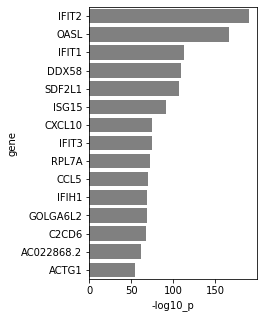

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (3,5))

ax = sns.barplot(data = df[1:16], x = '-log10_p', y = 'gene', color = 'grey')

plt.show()
